In [1]:
import pandas as pd
import os

In [6]:
Sex=['M','F','Undetermined']
Gender=input('For this study on which gender do you want the analysis (M/F/Undetermined) ? ')
while Gender not in Sex:
    Gender=input('For this study on which gender do you want the analysis (M/F/Undetermined) ? ')

For this study on which gender do you want the analysis (M/F/Undetermined) ? i
For this study on which gender do you want the analysis (M/F/Undetermined) ? Undetermined


In [7]:
shark=pd.read_csv(r'C:\Users\galic156685\0323_2020DATAPAR\Projects\Project_week 2\GSAF5.csv', encoding="cp1252", sep=',')

In [8]:
#Choose of column
#Rename of column Sex which has a space at the end
df=pd.DataFrame(shark[['Year','Type','Activity','Sex ']])
df=df.rename(columns={'Sex ':'Sex'})

In [9]:
#identifiaction of na value
df.isna().sum()

Year          0
Type          0
Activity    527
Sex         567
dtype: int64

In [10]:
# drop of row with na values -> a missing value conduct a wrong information for the activity. We only want Surfing
df['Activity'].dropna()


0            Surfing
1            Surfing
2            Surfing
3            Surfing
4            Surfing
            ...     
5986        Swimming
5987          Diving
5988    Pearl diving
5989        Swimming
5991        Swimming
Name: Activity, Length: 5465, dtype: object

In [11]:
# Fill N/A with Undetermined because we want the impact of the women / men or what ever his sex
df['Sex'].fillna('Undetermined')

0       M
1       M
2       M
3       M
4       M
       ..
5987    M
5988    M
5989    M
5990    M
5991    M
Name: Sex, Length: 5992, dtype: object

In [12]:
# We filtered on 3 items : 1- Surfing 2-Since 1890 because it the apparition of surf for the public 3- only Unprovoked - we want to show that the sharks are attaking more often
filtered=(df.Activity.str.contains('Surfing'))&(df.Year>1890)&(df.Type.str.contains('Unprovoked'))&(df.Sex.str.contains(Gender))
df=df.loc[filtered]
df

,Year,Type,Activity,Sex


In [13]:
#creation of the period of ten years to bins my results
labels=[i for i in range(1890,2026,10)]


In [14]:
#creation of cutoffs
cutoffs=tuple([i for i in range(1880,2026,10)])


In [15]:
bins=pd.cut(df.Year, cutoffs,labels=labels)

In [16]:
bins.value_counts()

2020    0
2010    0
2000    0
1990    0
1980    0
1970    0
1960    0
1950    0
1940    0
1930    0
1920    0
1910    0
1900    0
1890    0
Name: Year, dtype: int64

In [17]:
df['bins']=pd.cut(df.Year, cutoffs,labels=labels)
df['Counter']=1
df

,Year,Type,Activity,Sex,bins,Counter


In [18]:
grouped=df.groupby('bins')['Counter'].agg('sum').reset_index()

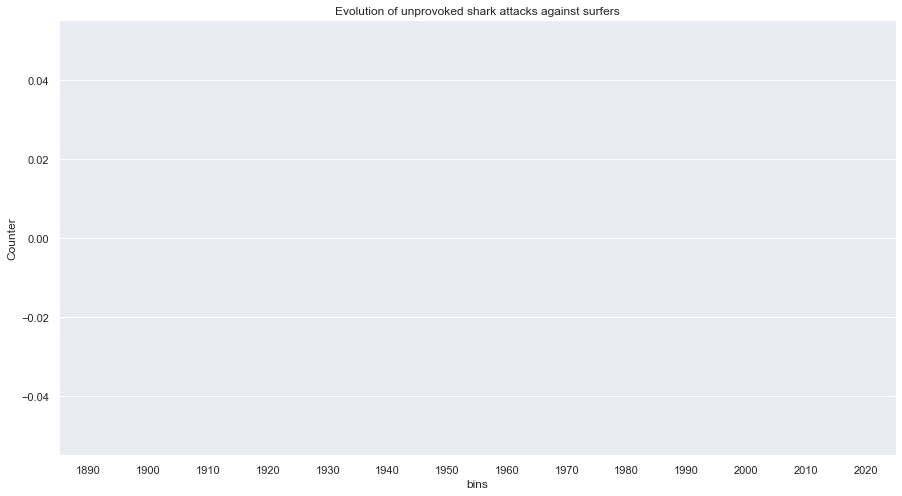

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig,ax=plt.subplots(figsize=(15,8))
barchart=sns.barplot(data=grouped, x='bins',y='Counter')
plt.title("Evolution of unprovoked shark attacks against surfers")
barchart